## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sean\Anaconda3

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.0489 - accuracy: 0.2695 - val_loss: 1.9479 - val_accuracy: 0.2931
Epoch 2/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.8705 - accuracy: 0.3383 - val_loss: 1.8393 - val_accuracy: 0.3499
Epoch 3/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.8032 - accuracy: 0.3644 - val_loss: 1.8351 - val_accuracy: 0.3541
Epoch 4/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.7614 - accuracy: 0.3789 - val_loss: 1.7822 - val_accuracy: 0.3681
Epoch 5/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.7260 - accuracy: 0.3926 - val_loss: 1.7470 - val_accuracy: 0.3702
Epoch 6/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6971 - accuracy: 0.4047 - val_loss: 1.7634 - val_accuracy: 0.3710
Epoch 7/500
50000/50000 [==============================] - 3

50000/50000 [==============================] - 3s 62us/step - loss: 1.2120 - accuracy: 0.5732 - val_loss: 1.4935 - val_accuracy: 0.4750
Epoch 55/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2059 - accuracy: 0.5775 - val_loss: 1.3687 - val_accuracy: 0.5089
Epoch 56/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1986 - accuracy: 0.5782 - val_loss: 1.3843 - val_accuracy: 0.5096
Epoch 57/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1933 - accuracy: 0.5826 - val_loss: 1.3460 - val_accuracy: 0.5241
Epoch 58/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1794 - accuracy: 0.5879 - val_loss: 1.4503 - val_accuracy: 0.4961
Epoch 59/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1755 - accuracy: 0.5877 - val_loss: 1.6104 - val_accuracy: 0.4550
Epoch 60/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1734 - accuracy: 0.5886 - val_loss: 

Epoch 109/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.9058 - accuracy: 0.6838 - val_loss: 1.6229 - val_accuracy: 0.4697
Epoch 110/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.9083 - accuracy: 0.6843 - val_loss: 1.3737 - val_accuracy: 0.5293
Epoch 111/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.8915 - accuracy: 0.6906 - val_loss: 1.3916 - val_accuracy: 0.5332
Epoch 112/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.8872 - accuracy: 0.6923 - val_loss: 1.4565 - val_accuracy: 0.5144
Epoch 113/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.8806 - accuracy: 0.6945 - val_loss: 1.3797 - val_accuracy: 0.5290
Epoch 114/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.8777 - accuracy: 0.6940 - val_loss: 1.3941 - val_accuracy: 0.5288
Epoch 115/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.8761 - accuracy:

50000/50000 [==============================] - 3s 54us/step - loss: 0.6285 - accuracy: 0.7858 - val_loss: 1.6975 - val_accuracy: 0.5004
Epoch 164/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.6259 - accuracy: 0.7877 - val_loss: 1.5879 - val_accuracy: 0.5137
Epoch 165/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.6242 - accuracy: 0.7888 - val_loss: 1.7939 - val_accuracy: 0.4856
Epoch 166/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.6187 - accuracy: 0.7892 - val_loss: 1.5808 - val_accuracy: 0.5131
Epoch 167/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.6110 - accuracy: 0.7934 - val_loss: 1.7487 - val_accuracy: 0.4891
Epoch 168/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.6036 - accuracy: 0.7939 - val_loss: 1.5270 - val_accuracy: 0.5292
Epoch 169/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.5997 - accuracy: 0.7969 - val_

Epoch 218/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3453 - accuracy: 0.8907 - val_loss: 2.4394 - val_accuracy: 0.4499
Epoch 219/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3922 - accuracy: 0.8753 - val_loss: 1.9926 - val_accuracy: 0.5020
Epoch 220/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.4345 - accuracy: 0.8652 - val_loss: 2.0413 - val_accuracy: 0.4957
Epoch 221/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3623 - accuracy: 0.8830 - val_loss: 1.8087 - val_accuracy: 0.5254
Epoch 222/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.3525 - accuracy: 0.8877 - val_loss: 2.0156 - val_accuracy: 0.5014
Epoch 223/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3539 - accuracy: 0.8875 - val_loss: 2.0769 - val_accuracy: 0.4908
Epoch 224/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3419 - accuracy:

50000/50000 [==============================] - 3s 54us/step - loss: 0.2523 - accuracy: 0.9301 - val_loss: 2.0735 - val_accuracy: 0.5304
Epoch 273/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1711 - accuracy: 0.9540 - val_loss: 2.1416 - val_accuracy: 0.5285
Epoch 274/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1965 - accuracy: 0.9472 - val_loss: 2.1123 - val_accuracy: 0.5338
Epoch 275/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1470 - accuracy: 0.9639 - val_loss: 2.4357 - val_accuracy: 0.5033
Epoch 276/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.2871 - accuracy: 0.9227 - val_loss: 2.2606 - val_accuracy: 0.5118
Epoch 277/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1742 - accuracy: 0.9558 - val_loss: 2.0876 - val_accuracy: 0.5359
Epoch 278/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2028 - accuracy: 0.9463 - val_

Epoch 327/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0588 - accuracy: 0.9916 - val_loss: 2.8138 - val_accuracy: 0.5140
Epoch 328/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2603 - accuracy: 0.9321 - val_loss: 2.4313 - val_accuracy: 0.5331
Epoch 329/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0636 - accuracy: 0.9906 - val_loss: 2.4381 - val_accuracy: 0.5328
Epoch 330/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0578 - accuracy: 0.9924 - val_loss: 2.4537 - val_accuracy: 0.5371
Epoch 331/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0557 - accuracy: 0.9927 - val_loss: 2.4729 - val_accuracy: 0.5379
Epoch 332/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0524 - accuracy: 0.9937 - val_loss: 2.4836 - val_accuracy: 0.5330
Epoch 333/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0509 - accuracy:

50000/50000 [==============================] - 3s 56us/step - loss: 0.0498 - accuracy: 0.9938 - val_loss: 2.6872 - val_accuracy: 0.5285
Epoch 382/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0406 - accuracy: 0.9962 - val_loss: 2.6561 - val_accuracy: 0.5335
Epoch 383/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0358 - accuracy: 0.9970 - val_loss: 2.7123 - val_accuracy: 0.5227
Epoch 384/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0329 - accuracy: 0.9974 - val_loss: 2.6887 - val_accuracy: 0.5349
Epoch 385/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0307 - accuracy: 0.9980 - val_loss: 2.7063 - val_accuracy: 0.5341
Epoch 386/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0290 - accuracy: 0.9983 - val_loss: 2.6990 - val_accuracy: 0.5354
Epoch 387/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0274 - accuracy: 0.9982 - val_

50000/50000 [==============================] - 3s 66us/step - loss: 0.0107 - accuracy: 0.9999 - val_loss: 3.0688 - val_accuracy: 0.5337
Epoch 436/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0106 - accuracy: 0.9999 - val_loss: 3.0703 - val_accuracy: 0.5366
Epoch 437/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0106 - accuracy: 0.9998 - val_loss: 3.0777 - val_accuracy: 0.5347
Epoch 438/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0105 - accuracy: 0.9998 - val_loss: 3.0808 - val_accuracy: 0.5355
Epoch 439/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0102 - accuracy: 0.9999 - val_loss: 3.0778 - val_accuracy: 0.5361
Epoch 440/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0101 - accuracy: 0.9999 - val_loss: 3.1216 - val_accuracy: 0.5317
Epoch 441/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0101 - accuracy: 0.9998 - val_

Epoch 490/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.2915 - val_accuracy: 0.5374
Epoch 491/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.3027 - val_accuracy: 0.5371
Epoch 492/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.2948 - val_accuracy: 0.5354
Epoch 493/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.2977 - val_accuracy: 0.5346
Epoch 494/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.3069 - val_accuracy: 0.5372
Epoch 495/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.3125 - val_accuracy: 0.5359
Epoch 496/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0059 - accuracy:

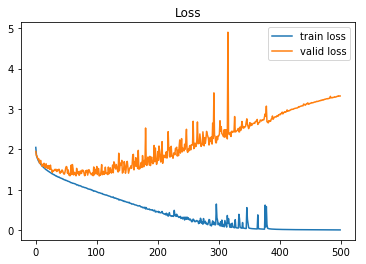

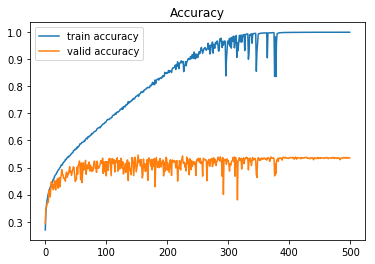

In [9]:

import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()